<a href="https://colab.research.google.com/github/SalgadoHUB/image_processing_introduction/blob/main/P2_transformaciones_intensidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Transofrmaciones en intensidad


In [ ]:
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np


Cargamos una imagen de ejemplo

In [ ]:

# Imágenes de ejemplo: https://testimages.juliaimages.org/stable/imagelist_dip3e/
!wget "https://testimages.juliaimages.org/stable/thumbnails/Fig0115(a)(thum-print-loop).png"
!ls


--2024-04-24 14:18:00--  https://testimages.juliaimages.org/stable/thumbnails/Fig0115(a)(thum-print-loop).png
Resolving testimages.juliaimages.org (testimages.juliaimages.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to testimages.juliaimages.org (testimages.juliaimages.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33409 (33K) [image/png]
Saving to: ‘Fig0115(a)(thum-print-loop).png’

Fig0115(a)(thum-pri 100%[===================>]  32.63K  --.-KB/s    in 0s      

2024-04-24 14:18:00 (77.1 MB/s) - ‘Fig0115(a)(thum-print-loop).png’ saved [33409/33409]

'Fig0115(a)(thum-print-loop).png'   sample_data




La función `cv2.imread()` tiene 2 argumentos. El primero es simplemente la ruta al archivo de la imagen (o el nombre de la imagen si la tenemos en el directorio de trabajo).  El segundo argumento (opcional) especifica cómo debemos leer la imagen. Tenemos tres opciones:  
* `cv2.IMREAD_COLOR`: Carga la imagen a color. Cualquier transparencia será obviada. Es la opción por defecto.
* `cv2.IMREAD_GRAYSCALE`: Carga la imagen en escala de grises.
* `cv2.IMREAD_UNCHANGED`: Carga la imagen sin cambios incluyendo canal alfa (transparencia).

Estas opciones pueden sustituirse por los enteros 1, 0, -1 respectivamente.

En nuestro caso vamos a trabajar con imágenes en escala de grises.


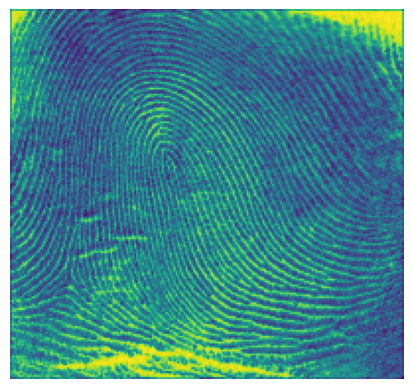

In [ ]:
I = cv2.imread('Fig0115(a)(thum-print-loop).png',0)
plt.imshow(I)
plt.axis("off")
plt.show()

## Negativo de una imagen
Simplemente ejecutamos:

$ I_{neg} = Max(I) - I $


(array([ 406.,  386.,  388.,  677.,  983., 1301., 1552., 1806., 2117.,
        2504., 2897., 3477., 3936., 4195., 4305., 3710., 2093.,  721.,
         135.,   11.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <BarContainer object of 20 artists>)

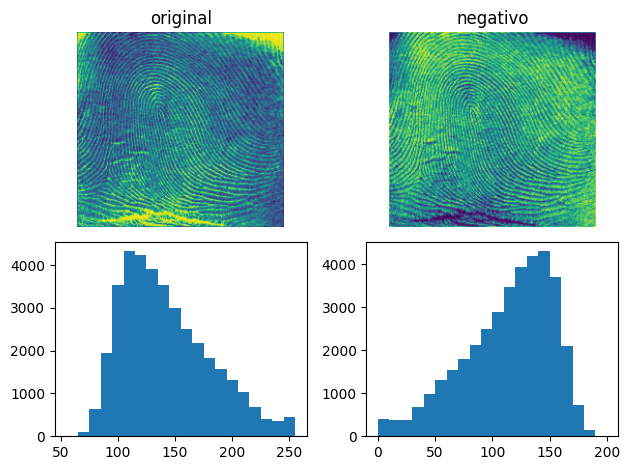

In [ ]:
M = I.max()
I_neg = M - I

fig, axs = plt.subplots(2, 2, tight_layout=True)

axs[0,0].imshow(I)
axs[0,0].axis("off")
axs[0,0].set_title('original')

axs[0,1].imshow(I_neg)
axs[0,1].axis("off")
axs[0,1].set_title('negativo')

n_bins = 20
axs[1,0].hist(I.flatten(), bins=n_bins)
axs[1,1].hist(I_neg.flatten(), bins=n_bins)



## Umbralización (Thresholding)

*I* es una imagen con *n* niveles de gris

(array([  1.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   1.,   0.,   3.,
          2.,   1.,   0.,   5.,   2.,   9.,   5.,   0.,  15.,   8.,  28.,
          0.,  13.,  25.,  25.,  42.,   0.,  40.,  38.,  58.,   0.,  60.,
         72.,  86., 102.,   0., 106., 117., 157., 136.,   0., 159., 173.,
        225.,   0., 196., 231., 258., 294.,   0., 264., 292., 292.,   0.,
        338., 375., 377., 386.,   0., 388., 415., 401.,   0., 446., 426.,
        424., 426.,   0., 412., 425., 440., 440.,   0., 449., 440., 423.,
          0., 432., 456., 453., 385.,   0., 438., 431., 415.,   0., 389.,
        416., 380., 389.,   0., 406., 392., 420.,   0., 397., 401., 381.,
        377.,   0., 374., 399., 374., 359.,   0., 370., 341., 340.,   0.,
        350., 336., 320., 345.,   0., 342., 312., 308.,   0., 302., 302.,
        285., 268.,   0., 280., 309., 283.,   0., 248., 264., 252., 276.,
          0., 263., 226., 280., 220.,   0., 245., 239., 239.,   0., 231.,
        207., 220., 213.,   0., 225., 

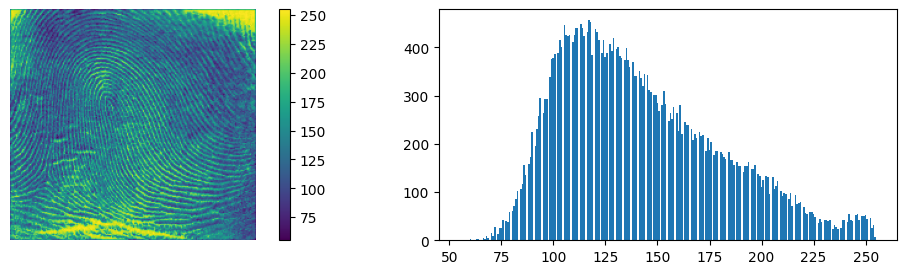

In [ ]:
I = cv2.imread('Fig0115(a)(thum-print-loop).png',0)

fig, ax = plt.subplots(figsize=(13, 3), ncols=2)
pos = ax[0].imshow(I)
ax[0].axis("off")
fig.colorbar(pos,ax=ax[0])

ax[1].hist(I.flatten(), 256)

### 1 umbral
Tomamos, por ejemplo n=128.

(array([16357.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

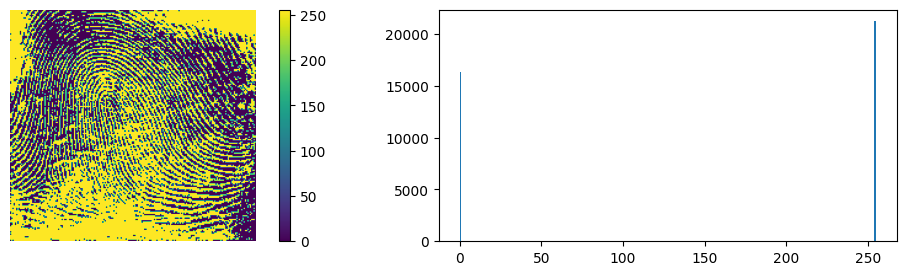

In [ ]:
umbral = 128

I_th = I
I_th[I > umbral] = 255
I_th[I <= umbral] = 0

fig, ax = plt.subplots(figsize=(13, 3), ncols=2)
pos = ax[0].imshow(I_th)
ax[0].axis("off")
fig.colorbar(pos,ax=ax[0])

ax[1].hist(I_th.flatten(), 256)

In [ ]:
# Otra opción: usar openCV
_, result = cv2.threshold(I, umbral, 255, cv2.THRESH_BINARY)

### Número de niveles arbitrario (Reducción de niveles de gris)


## Transformación Gamma

La transformación Gamma para una imagen *I* viene descrita por la siguiente expresión:

$ I_t = c I^\gamma $

donde *c* y $\gamma$ son constantes, *I* son los niveles de gris de una imagen, e *I_t* es la imagen transformada. Se utiliza para resaltar ciertas regiones de la imagen.

Primero cargamos una imagen.

--2024-04-24 16:34:10--  https://testimages.juliaimages.org/stable/thumbnails/Fig0343(a)(skeleton_orig).png
Resolving testimages.juliaimages.org (testimages.juliaimages.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to testimages.juliaimages.org (testimages.juliaimages.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11255 (11K) [image/png]
Saving to: ‘Fig0343(a)(skeleton_orig).png’

Fig0343(a)(skeleton 100%[===================>]  10.99K  --.-KB/s    in 0.001s  

2024-04-24 16:34:10 (8.98 MB/s) - ‘Fig0343(a)(skeleton_orig).png’ saved [11255/11255]



(array([1.0268e+04, 3.5100e+02, 6.3300e+02, 3.2100e+02, 9.3600e+02,
        5.9900e+02, 8.6300e+02, 4.1900e+02, 5.9400e+02, 2.8200e+02,
        4.9700e+02, 2.5100e+02, 3.8900e+02, 2.3100e+02, 3.5300e+02,
        2.2900e+02, 3.2100e+02, 1.6700e+02, 3.0100e+02, 1.6100e+02,
        2.4100e+02, 1.4100e+02, 2.2500e+02, 1.1600e+02, 2.1200e+02,
        1.4500e+02, 2.1400e+02, 1.2900e+02, 1.9000e+02, 1.0900e+02,
        1.6500e+02, 1.2300e+02, 1.7100e+02, 1.0300e+02, 1.9200e+02,
        9.6000e+01, 1.5300e+02, 9.8000e+01, 1.4000e+02, 8.6000e+01,
        1.3500e+02, 7.7000e+01, 1.2200e+02, 7.8000e+01, 1.2500e+02,
        9.1000e+01, 9.4000e+01, 8.1000e+01, 1.3100e+02, 7.1000e+01,
        1.1300e+02, 6.1000e+01, 1.2300e+02, 6.4000e+01, 9.9000e+01,
        5.4000e+01, 1.0300e+02, 4.5000e+01, 8.1000e+01, 4.9000e+01,
        8.3000e+01, 5.6000e+01, 5.4000e+01, 4.9000e+01, 7.6000e+01,
        3.7000e+01, 5.8000e+01, 3.9000e+01, 4.7000e+01, 3.6000e+01,
        4.3000e+01, 3.5000e+01, 4.1000e+01, 3.40

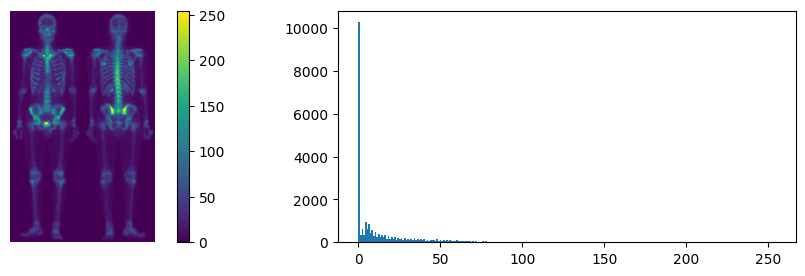

In [ ]:
!wget "https://testimages.juliaimages.org/stable/thumbnails/Fig0343(a)(skeleton_orig).png"

I = cv2.imread('Fig0343(a)(skeleton_orig).png',0)

fig, ax = plt.subplots(figsize=(13, 3), ncols=2)
pos = ax[0].imshow(I)
ax[0].axis("off")
fig.colorbar(pos,ax=ax[0])

ax[1].hist(I.flatten(), 256)

Si la imagen es `uin8` podemos tener problemas al aplicar un exponente. La convertimos a `float`.

In [ ]:
I.dtype
I = I.astype(float)
I.dtype

dtype('float64')

Probamos diferentes valores para $\gamma$.

(array([1.0268e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.5100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.3300e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.2100e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.3600e+02, 0.0000e+00, 0.0000e+00,
        5.9900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.6300e+02,
        0.0000e+00, 0.0000e+00, 4.1900e+02, 0.0000e+00, 0.0000e+00,
        5.9400e+02, 0.0000e+00, 0.0000e+00, 2.8200e+02, 0.0000e+00,
        4.9700e+02, 0.0000e+00, 0.0000e+00, 2.5100e+02, 0.0000e+00,
        3.8900e+02, 0.0000e+00, 2.3100e+02, 0.0000e+00, 3.5300e+02,
        0.0000e+00, 2.2900e+02, 0.0000e+00, 0.0000e+00, 3.2100e+02,
        1.6700e+02, 0.0000e+00, 3.0100e+02, 0.0000e+00, 1.6100e+02,
        0.0000e+00, 2.4100e+02, 0.0000e+00, 1.41

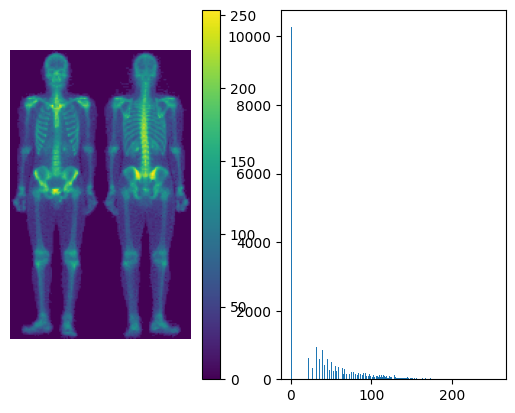

In [ ]:
g = 0.5
c = 256/(256**g)
I_g = c*(I**g)
I_g = I_g.astype(np.uint8)

fig, ax = plt.subplots(ncols=2, nrows=1)
pos = ax[0].imshow(I_g)
ax[0].axis("off")
fig.colorbar(pos,ax=ax[0])
ax[1].hist(I_g.flatten(), 256)



In [ ]:
I_g.max()

248

## Filtro LOG

Dada una imagen *I*, el filtro LOG se define como,

$I_t = c \log(1 + I)$

donde *c* es una constante. Se usa para amplificar los niveles más bajos de intensidad.

(array([1.0268e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.5100e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.3300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2100e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

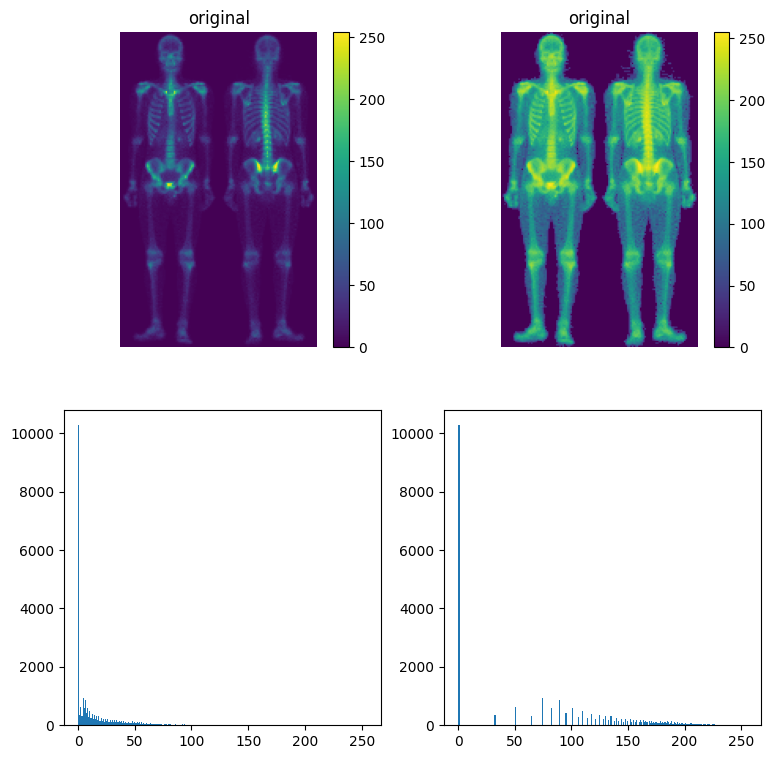

In [ ]:
I = cv2.imread('Fig0343(a)(skeleton_orig).png',0)

I = I.astype(float)
c = 256/np.log(256)
I_log = c*np.log(1+I)
I_log = I_log.astype(np.uint8)

fig, ax = plt.subplots(figsize=(9, 9), ncols=2, nrows=2)
pos = ax[0,0].imshow(I)
ax[0,0].axis("off")
ax[0,0].set_title("original")
fig.colorbar(pos,ax=ax[0,0])

ax[1,0].hist(I.flatten(), 256)

pos = ax[0,1].imshow(I_log)
ax[0,1].axis("off")
ax[0,1].set_title("original")
fig.colorbar(pos,ax=ax[0,1])

ax[1,1].hist(I_log.flatten(), 256)